In [2]:
from perlin_noise import PerlinNoise
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
import pandas as pd

In [3]:
noise = PerlinNoise(octaves=4, seed=69)

In [112]:
def normalize_timestamp(dt):
    ts_start = datetime(2019, 1, 1, 0, 0, 0).timestamp()
    return dt.timestamp() - ts_start

In [5]:
def get_micros_from_end(dt):
    return get_micros(dt.replace(hour=23, minute=59, second=59, microsecond=999999))

In [6]:
def get_time(val):
    if val < -0.2:
        ret = 'TORMENTA'
    elif val < -0.05:
        ret = 'LLUVIA'
    elif val < 0.1:
        ret = 'NUBES DENSAS'
    elif val < 0.25:
        ret = 'NUBES LIGERAS'
    else:
        ret = 'DESPEJADO'
    return ret

In [160]:


dt_start = datetime(2019, 1, 1, 0, 0, 0) # Datetime 2019-01-01 00:00:00
dt_end = datetime(2020, 1, 30, 0, 0, 0) # Datetime 2019-01-10 00:00:00

y = []
x = []


while dt_start < dt_end: # While dt is less than dtf   
    ts = normalize_timestamp(dt_start)
    
    n = noise.noise(ts/ 1000000) # Get noise value
    print(n)
    dt_start = dt_start + timedelta(hours=1)
    y.append(n)
    x.append(dt_start)




0.0
0.005323641131229323
0.010746022808144698
0.01634924229184557
0.02219842904250474
0.02834301754746248
0.0348179823401339
0.04164503520972995
0.048833784601791524
0.05638285720953657
0.0642809817560218
0.07250803496711593
0.08103604973528751
0.08983018547420646
0.0988496606641573
0.10804864758826721
0.11737712925954714
0.12678171853874567
0.13620643944301666
0.14559347064540046
0.15488385116511794
0.16401814824867844
0.17293708744180034
0.1815821448521456
0.18989610160286763
0.1978235604769717
0.20531142475248998
0.2123093392284689
0.21877009344177045
0.22464998707468603
0.22990915755336483
0.23451186983705447
0.23842676839815563
0.2416270913930898
0.24409084702398054
0.24580095209114744
0.24674533273641452
0.2469169873772314
0.24631401183160673
0.24493958663385768
0.24280192654116975
0.23991419223097235
0.2362943641891257
0.23196507878892264
0.22695342656090325
0.22129071265348257
0.21501217948439186
0.20815669158293293
0.2007663826230467
0.19288626464719408
0.18456379948105106
0.1

In [161]:
print(max(y))
print(min(y))

0.4564135849800362
-0.4445735790797117


In [162]:
df = pd.DataFrame({'x': x, 'y': y})

<AxesSubplot:xlabel='x', ylabel='y'>

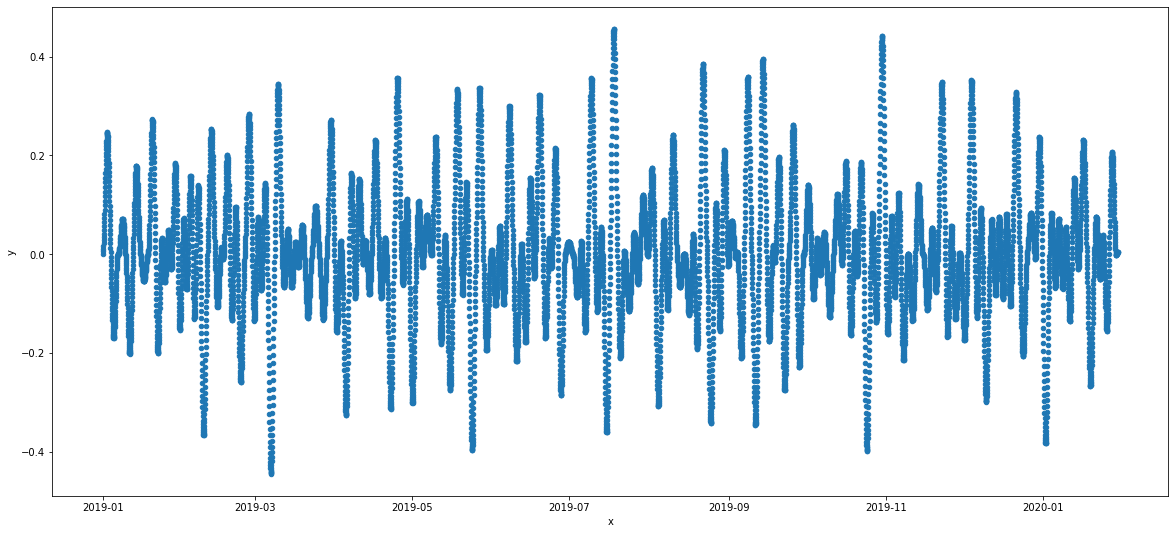

In [163]:
df.plot(x='x', y='y', kind="scatter", figsize=(20, 9))

In [164]:
df.sort_values(by=['y'], inplace=True)

<AxesSubplot:xlabel='y', ylabel='y'>

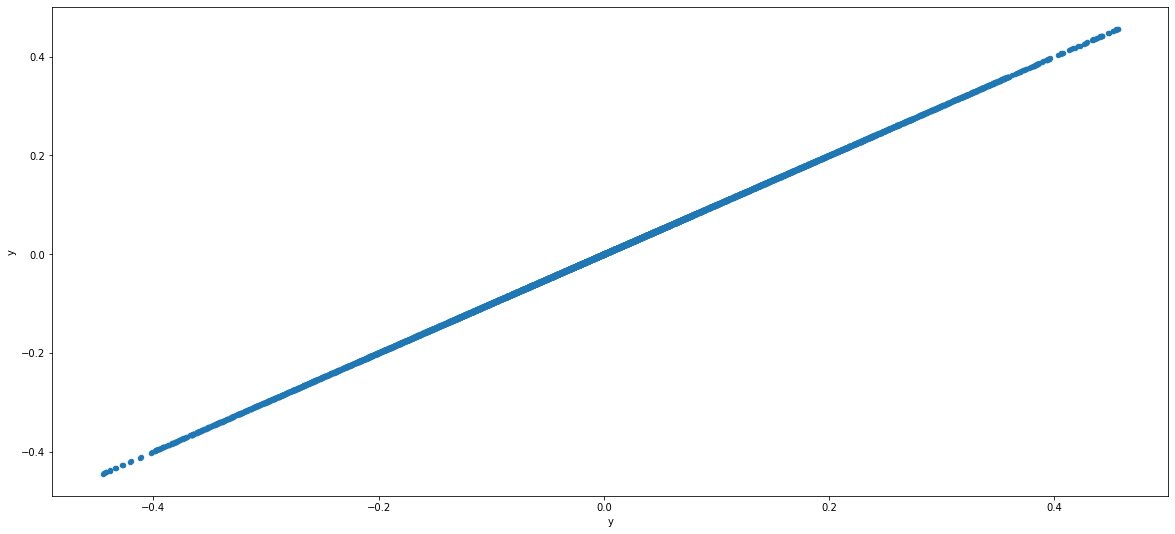

In [165]:
df.plot(x='y', y='y', kind="scatter", figsize=(20, 9))

array([[<AxesSubplot:title={'center':'y'}>]], dtype=object)

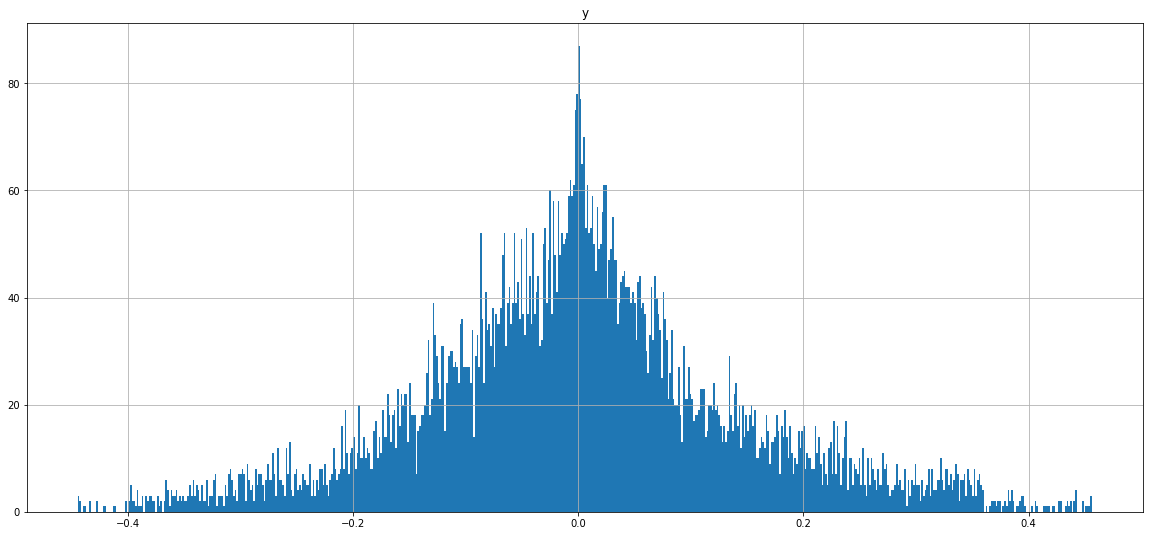

In [166]:
df.hist(column='y', bins=600, figsize=(20, 9))

In [149]:
df.apply(lambda row: print(f'Tiempo: {get_time(row["y"])} - Valor: {row["y"]}'), axis=1)

Tiempo: TORMENTA - Valor: -0.20146602473218064
Tiempo: TORMENTA - Valor: -0.20119719273353986
Tiempo: TORMENTA - Valor: -0.2010967570840021
Tiempo: TORMENTA - Valor: -0.20029297613827063
Tiempo: TORMENTA - Valor: -0.20021365768779179
Tiempo: TORMENTA - Valor: -0.2000908296385206
Tiempo: LLUVIA - Valor: -0.19992773028125072
Tiempo: LLUVIA - Valor: -0.19961497238482714
Tiempo: LLUVIA - Valor: -0.1987688860796203
Tiempo: LLUVIA - Valor: -0.19876025577543016
Tiempo: LLUVIA - Valor: -0.19845379562713075
Tiempo: LLUVIA - Valor: -0.19812492366992207
Tiempo: LLUVIA - Valor: -0.19675372584794104
Tiempo: LLUVIA - Valor: -0.1966100584934335
Tiempo: LLUVIA - Valor: -0.1961952495066063
Tiempo: LLUVIA - Valor: -0.1957417238377614
Tiempo: LLUVIA - Valor: -0.1939036922642981
Tiempo: LLUVIA - Valor: -0.19385750676187502
Tiempo: LLUVIA - Valor: -0.19332872416393432
Tiempo: LLUVIA - Valor: -0.1924685433890656
Tiempo: LLUVIA - Valor: -0.19052173763468094
Tiempo: LLUVIA - Valor: -0.19024498440602247
Tiempo

246    None
245    None
247    None
244    None
509    None
       ... 
460    None
456    None
459    None
457    None
458    None
Length: 696, dtype: object

In [196]:
import numpy as np

def lerp(a, b, t):
    return ((1.0 - t) * a + b * t)
    
def inv_lerp(a, b, v):
    return ((v - a) / (b - a))

def remap(iMin, iMax, oMin, oMax, v):
    t = inv_lerp(iMin, iMax, v)
    return lerp(oMin, oMax, t)

In [199]:
x_prima = np.linspace(0, 1, len(x))
y_prima = [remap(min(y), max(y), 0, 1, i) for i in y]

<AxesSubplot:xlabel='x', ylabel='y'>

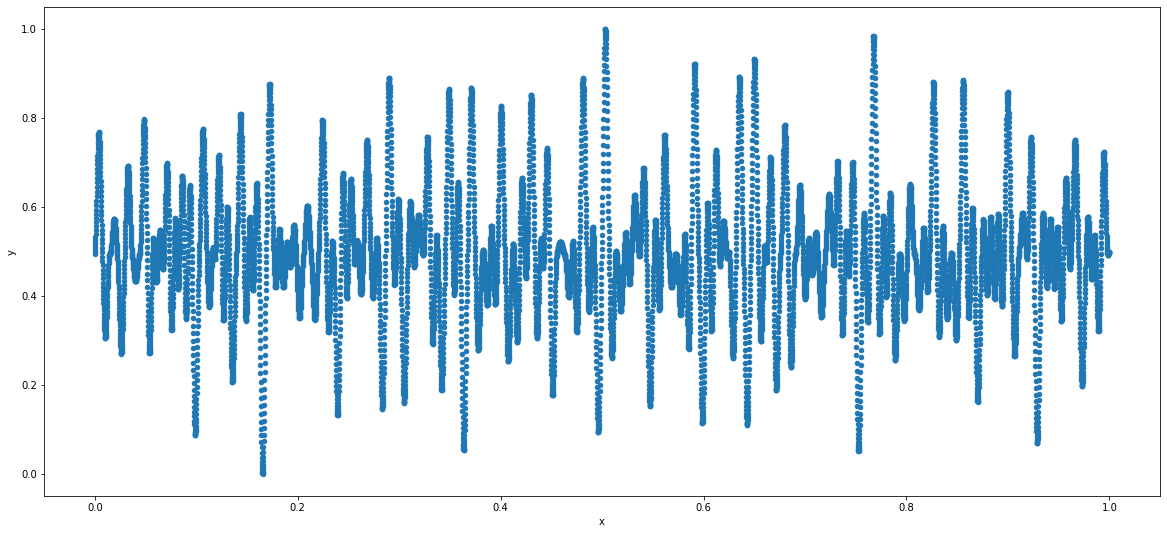

In [200]:
pd.DataFrame({'x': x_prima, 'y': y_prima}).plot(x='x', y='y', kind="scatter", figsize=(20, 9))

<AxesSubplot:xlabel='x', ylabel='y'>

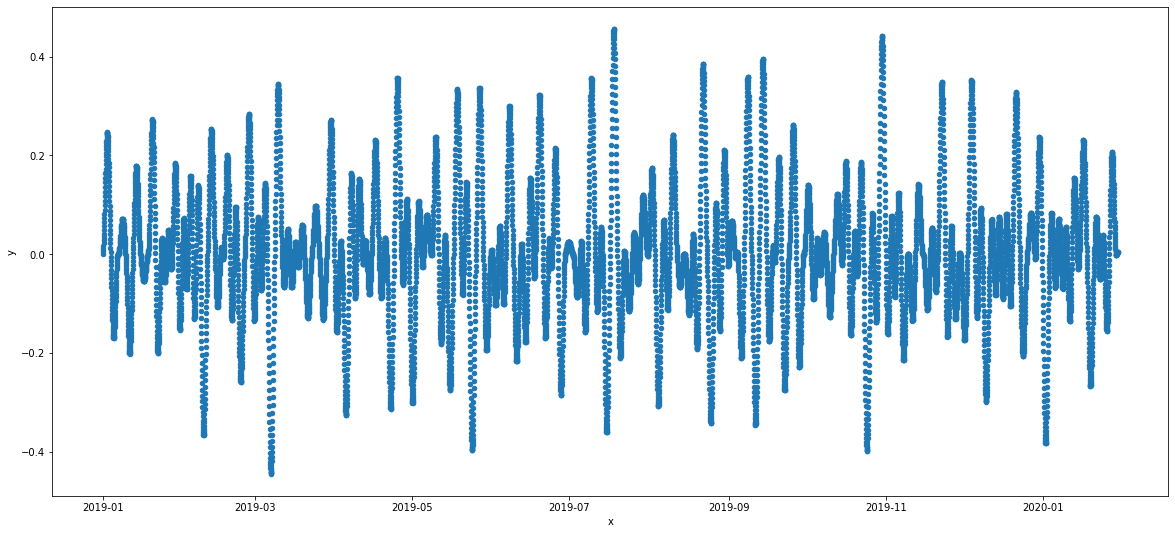

In [187]:
df.plot(x='x', y='y', kind="scatter", figsize=(20, 9))